# packages

In [1]:
import time
import investpy
# https://investpy.readthedocs.io/_info/introduction.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pyfolio as pf #https://quantopian.github.io/pyfolio/ - need to install from git because of dependencies errors
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf #https://pypi.org/project/yfinance/#description

C:\Users\User\Anaconda3\envs\py37_trade\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# variables

In [59]:
finax_tickers = ['FRCK', 'XXSC', 'XSX6', 'XHYA', 'XBLC', 'DBZB', 'IS3N', 'ZPRR', 'SPY4', 'SXR8']
from_date = '01/01/1990'
to_date = '21/03/2021'

# useful functions

In [ ]:
stocks = investpy.get_stocks_list()
funds = investpy.get_funds_list()
etfs = investpy.get_etfs_list()

# Retrieve the recent historical data (past month) of a stock as a pandas.DataFrame on ascending date order
df_bbva = investpy.get_stock_recent_data(stock='bbva', country='spain', as_json=False, order='ascending')

# Retrieve the company profile of the introduced stock on english
profile = investpy.get_stock_company_profile(stock='bbva', country='spain', language='english')

df_aapl = investpy.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2010',
                                        to_date='01/01/2020')

df_fund = investpy.get_fund_historical_data(fund='bbva plan multiactivo moderado pp',
                                       country='spain',
                                       from_date='01/01/2010',
                                       to_date='01/01/2019')

df_bbva_etf = investpy.get_etf_recent_data(etf='bbva accion dj eurostoxx 50',
                                  country='spain')
etfs_ger = investpy.get_etfs_list(country = 'germany') # basically useless because its not ticker, but etf name, wtf

investpy.get_stock_countries()

# finax tickers data

In [3]:
search = investpy.search_quotes('FRCK')
df_frck = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)
#df_frck.columns = 'frck_' + df_frck.columns

{'pairId': 1155487, 'name': 'UBS ETF - Bloomberg Barclays USD Emerging Markets Sovereign UCITS ETF (hedged to EUR) A-acc', 'flag': 'Germany', 'link': '/etfs/ubs-barclays-usd-emerging-mkts-sov?cid=1155487', 'symbol': 'FRCK', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}


In [4]:
search = investpy.search_quotes('XXSC')
df_xxsc = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date) # etf - xetra
#df_xxsc.columns = 'xxsc_' + df_xxsc.columns

{'pairId': 46497, 'name': 'db x-trackers MSCI Europe Small Cap UCITS DR 1C', 'flag': 'Germany', 'link': '/etfs/msci-europe-smlcap-trn-index', 'symbol': 'XXSC', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 45606, 'name': 'db x-trackers MSCI Europe Small Cap UCITS DR 1C', 'flag': 'UK', 'link': '/etfs/msci-europe-smlcap-trn-index?cid=45606', 'symbol': 'XXSC', 'type': 'ETF - London', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 4, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'London', 'exchangeID': 3}
{'pairId': 47147, 'name': 'db x-trackers MSCI Europe Small Cap UCITS DR 1C', 'flag': 'Italy', 'link': '/etfs/msci-europe-smlcap-trn-index?cid=47147', 'symbol': 'XXSC', 'type': 'ETF - Milan', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 10, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False

In [5]:
search = investpy.search_quotes('XSX6')
df_xsx6 = search[1].retrieve_historical_data(from_date=from_date, to_date=to_date)
#df_xsx6.columns = 'xsx6_' + df_xsx6.columns

{'pairId': 45605, 'name': 'Xtrackers Stoxx Europe 600 UCITS ETF 1C', 'flag': 'UK', 'link': '/etfs/db-stoxx-europe-600-uk', 'symbol': 'XSX6', 'type': 'ETF - London', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 4, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'London', 'exchangeID': 3}
{'pairId': 46414, 'name': 'Xtrackers Stoxx Europe 600 UCITS ETF 1C', 'flag': 'Germany', 'link': '/etfs/db-stoxx-europe-600-uk?cid=46414', 'symbol': 'XSX6', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 47144, 'name': 'Xtrackers Stoxx Europe 600 UCITS ETF 1C', 'flag': 'Italy', 'link': '/etfs/db-stoxx-europe-600-uk?cid=47144', 'symbol': 'XSX6', 'type': 'ETF - Milan', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 10, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Milan', 'exchangeID': 6}
{'

In [6]:
search = investpy.search_quotes('XHYA')
df_xhya = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)
#df_xhya.columns = 'xhya_' + df_xhya.columns

{'pairId': 1024628, 'name': 'db x-trackers II EUR High Yield Corporate Bond UCITS DR 1C', 'flag': 'Germany', 'link': '/etfs/dbxtrck-ii-eur-hiyld-corpbd-dr-1c', 'symbol': 'XHYA', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}


In [7]:
search = investpy.search_quotes('XBLC') 
df_xblc = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)
#df_xblc.columns = 'xblc_' + df_xblc.columns

{'pairId': 46372, 'name': 'Xtrackers II EUR Corporate Bond UCITS ETF 1C', 'flag': 'Germany', 'link': '/etfs/db-xtrackers-€-liquid-corp-100-tr', 'symbol': 'XBLC', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 1057224, 'name': 'Xtrackers II EUR Corporate Bond UCITS ETF 1C', 'flag': 'Italy', 'link': '/etfs/db-xtrackers-€-liquid-corp-100-tr?cid=1057224', 'symbol': 'XBLC', 'type': 'ETF - Milan', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 10, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Milan', 'exchangeID': 6}


In [8]:
# DBZB - vyzera rovnako ako XGSH
# len ina burza https://www.trackinsight.com/en/fund/LU0378818131

search = investpy.search_quotes('XGSH') 
df_xgsh = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)
#df_xgsh.columns = 'xgsh_' + df_xgsh.columns

{'pairId': 38689, 'name': 'Xtrackers II Global Government Bond UCITS ETF 1C - EUR Hedged', 'flag': 'Germany', 'link': '/etfs/db-xtrackers-ii-global-sov.-1c', 'symbol': 'XGSH', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 46975, 'name': 'Xtrackers II Global Government Bond UCITS ETF 1C - EUR Hedged', 'flag': 'Italy', 'link': '/etfs/db-xtrackers-ii-global-sov.-1c?cid=46975', 'symbol': 'XGSH', 'type': 'ETF - Milan', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 10, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Milan', 'exchangeID': 6}


In [9]:
search = investpy.search_quotes('IS3N') 
df_is3n = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)

{'pairId': 994133, 'name': 'iShares Core MSCI Emerging Markets IMI UCITS', 'flag': 'Germany', 'link': '/etfs/ishares-core-msci-em-imi?cid=994133', 'symbol': 'IS3N', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 1024491, 'name': 'iShares Core MSCI Emerging Markets IMI UCITS', 'flag': 'Germany', 'link': '/etfs/ishares-core-msci-em-imi?cid=1024491', 'symbol': 'IS3N', 'type': 'ETF - Frankfurt', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Frankfurt', 'exchangeID': 104}


In [10]:
search = investpy.search_quotes('ZPRR') 
df_zprr = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)

{'pairId': 949268, 'name': 'SPDR® Russell 2000 US Small Cap UCITS ETF', 'flag': 'Germany', 'link': '/etfs/spdr-russell-2000-us-small-cap', 'symbol': 'ZPRR', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 997091, 'name': 'SPDR® Russell 2000 US Small Cap UCITS ETF', 'flag': 'France', 'link': '/etfs/spdr-russell-2000-us-small-cap?cid=997091', 'symbol': 'ZPRR', 'type': 'ETF - Paris', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 22, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Paris', 'exchangeID': 9}


In [11]:
search = investpy.search_quotes('SPY4') 
df_spy4 = search[3].retrieve_historical_data(from_date=from_date, to_date=to_date)

{'pairId': 45768, 'name': 'SSgA SPDR S&P 400 US Mid Cap', 'flag': 'UK', 'link': '/etfs/spdr-s-p-400-us-mid-cap', 'symbol': 'SPY4', 'type': 'ETF - London', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 4, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'London', 'exchangeID': 3}
{'pairId': 996882, 'name': 'SSgA SPDR S&P 400 US Mid Cap', 'flag': 'Switzerland', 'link': '/etfs/spdr-s-p-400-us-mid-cap?cid=996882', 'symbol': 'SPY4', 'type': 'ETF - Switzerland', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 12, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Switzerland', 'exchangeID': 5}
{'pairId': 997082, 'name': 'SSgA SPDR S&P 400 US Mid Cap', 'flag': 'France', 'link': '/etfs/spdr-s-p-400-us-mid-cap?cid=997082', 'symbol': 'SPY4', 'type': 'ETF - Paris', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 22, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Paris', 'exchangeID': 9}
{'pairId': 

In [12]:
search = investpy.search_quotes('SXR8') 
df_sxr8 = search[0].retrieve_historical_data(from_date=from_date, to_date=to_date)

{'pairId': 45844, 'name': 'iShares Core S&P 500 UCITS ETF USD (Acc)', 'flag': 'Germany', 'link': '/etfs/cs-etf-(ie)-on-s-p-500?cid=45844', 'symbol': 'SXR8', 'type': 'ETF - Xetra', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Xetra', 'exchangeID': 4}
{'pairId': 1159398, 'name': 'iShares Core S&P 500 UCITS ETF USD (Acc)', 'flag': 'Germany', 'link': '/etfs/cs-etf-(ie)-on-s-p-500?cid=1159398', 'symbol': 'SXR8', 'type': 'ETF - Frankfurt', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Frankfurt', 'exchangeID': 104}
{'pairId': 1171216, 'name': 'iShares Core S&P 500 UCITS ETF USD (Acc)', 'flag': 'Germany', 'link': '/etfs/cs-etf-(ie)-on-s-p-500?cid=1171216', 'symbol': 'SXR8', 'type': 'ETF - TradeGate', 'pair_type_raw': 'etf', 'pair_type': 'etf', 'countryID': 17, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False,

# prepare one finax df with close prices

In [34]:
dfs = [df_frck, df_xxsc, df_xsx6, df_xhya, df_xblc, df_xgsh, df_is3n, df_zprr, df_spy4, df_sxr8]
cols = ['frck', 'xxsc', 'xsx6', 'xhya', 'xblc', 'xgsh', 'is3n', 'zprr', 'spy4', 'sxr8']
df_finax = pd.DataFrame()
for i, df in enumerate(dfs):
    s = df['Close']
    s.rename(cols[i], inplace = True)
    df_finax = df_finax.join(s, how = 'outer')
df_finax.head()

,frck,xxsc,xsx6,xhya,xblc,xgsh,is3n,zprr,spy4,sxr8
Date,,,,,,,,,,
2008-02-07,NaN,17.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-11,NaN,17.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-13,NaN,18.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-14,NaN,18.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-19,NaN,18.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#pickle.dump(df_finax, open('data/df_finax.pickle', 'wb'))

In [6]:
df_finax = pickle.load(open('data/df_finax.pickle', 'rb'))

# finax tickers stats

## describe

In [3]:
df_finax.shape

(3270, 10)

In [4]:
df_finax.describe()

,frck,xxsc,xsx6,xhya,xblc,xgsh,is3n,zprr,spy4,sxr8
count,1225.000000,3246.000000,3019.000000,1007.000000,2797.000000,2906.000000,1605.000000,1680.000000,1466.000000,2632.000000
mean,12.199731,29.797477,63.146181,19.434161,143.303922,214.674783,23.118307,33.434696,45.131405,174.959890
std,0.533273,11.602444,16.572734,0.691616,12.742046,18.810880,3.131831,6.044904,6.413519,70.133311
min,9.810000,8.700000,24.960000,15.630000,118.450000,174.350000,15.690000,21.340000,30.340000,67.670000
25%,11.820000,18.740000,46.765000,19.090000,135.800000,201.770000,20.900000,29.000000,39.560000,110.010000
50%,12.190000,29.490000,65.230000,19.300000,146.100000,220.660000,23.400000,34.080000,45.415000,173.865000
75%,12.630000,41.062500,78.010000,19.870000,151.880000,226.880000,25.089000,37.252500,49.110000,227.622500
max,13.270000,55.850000,95.370000,20.930000,164.120000,249.710000,33.192000,54.700000,66.290000,337.520000


## % nans

In [5]:
df_finax.isna().sum(axis = 'rows')/df_finax.shape[0]

frck    0.625382
xxsc    0.007339
xsx6    0.076758
xhya    0.692049
xblc    0.144648
xgsh    0.111315
is3n    0.509174
zprr    0.486239
spy4    0.551682
sxr8    0.195107
dtype: float64

## timeseries plot

<AxesSubplot:xlabel='Date'>

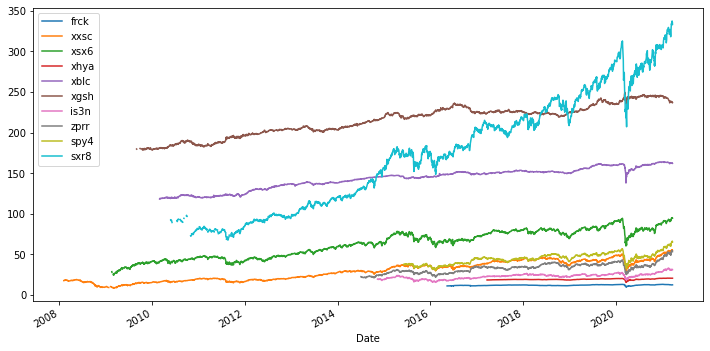

In [6]:
df_finax.plot(figsize = (12,6))

## correlations

In [18]:
df_finax_corr = df_finax.corr()

cm = sns.color_palette("coolwarm", as_cmap=True) # https://seaborn.pydata.org/tutorial/color_palettes.html
s = df_finax_corr.style.background_gradient(cmap=cm, axis = None)
s

,frck,xxsc,xsx6,xhya,xblc,xgsh,is3n,zprr,spy4,sxr8
frck,1.000000,0.726150,0.800122,0.886470,0.849737,0.487872,0.767437,0.613700,0.669535,0.661795
xxsc,0.726150,1.000000,0.990794,0.867939,0.940864,0.903540,0.919078,0.944442,0.921824,0.952607
xsx6,0.800122,0.990794,1.000000,0.922711,0.950673,0.908727,0.918617,0.914047,0.914348,0.945778
xhya,0.886470,0.867939,0.922711,1.000000,0.851912,0.425266,0.848759,0.821724,0.866754,0.731820
xblc,0.849737,0.940864,0.950673,0.851912,1.000000,0.970081,0.812922,0.824200,0.837174,0.938987
xgsh,0.487872,0.903540,0.908727,0.425266,0.970081,1.000000,0.478643,0.537102,0.451760,0.922411
is3n,0.767437,0.919078,0.918617,0.848759,0.812922,0.478643,1.000000,0.915948,0.921481,0.853642
zprr,0.613700,0.944442,0.914047,0.821724,0.824200,0.537102,0.915948,1.000000,0.987530,0.904471
spy4,0.669535,0.921824,0.914348,0.866754,0.837174,0.451760,0.921481,0.987530,1.000000,0.906600
sxr8,0.661795,0.952607,0.945778,0.731820,0.938987,0.922411,0.853642,0.904471,0.906600,1.000000


# returns

## frck

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.57,2020-02-21,2020-03-19,2020-12-16,214
1,9.32,2018-01-05,2018-11-27,2019-06-18,378
2,6.94,2016-09-29,2016-11-14,2017-05-16,164
3,5.73,2021-01-04,2021-03-08,NaT,NaN
4,2.94,2019-09-04,2019-12-03,2020-01-07,90


C:\Users\jaroslav_klen\AppData\Local\Continuum\anaconda3\envs\jk_py37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


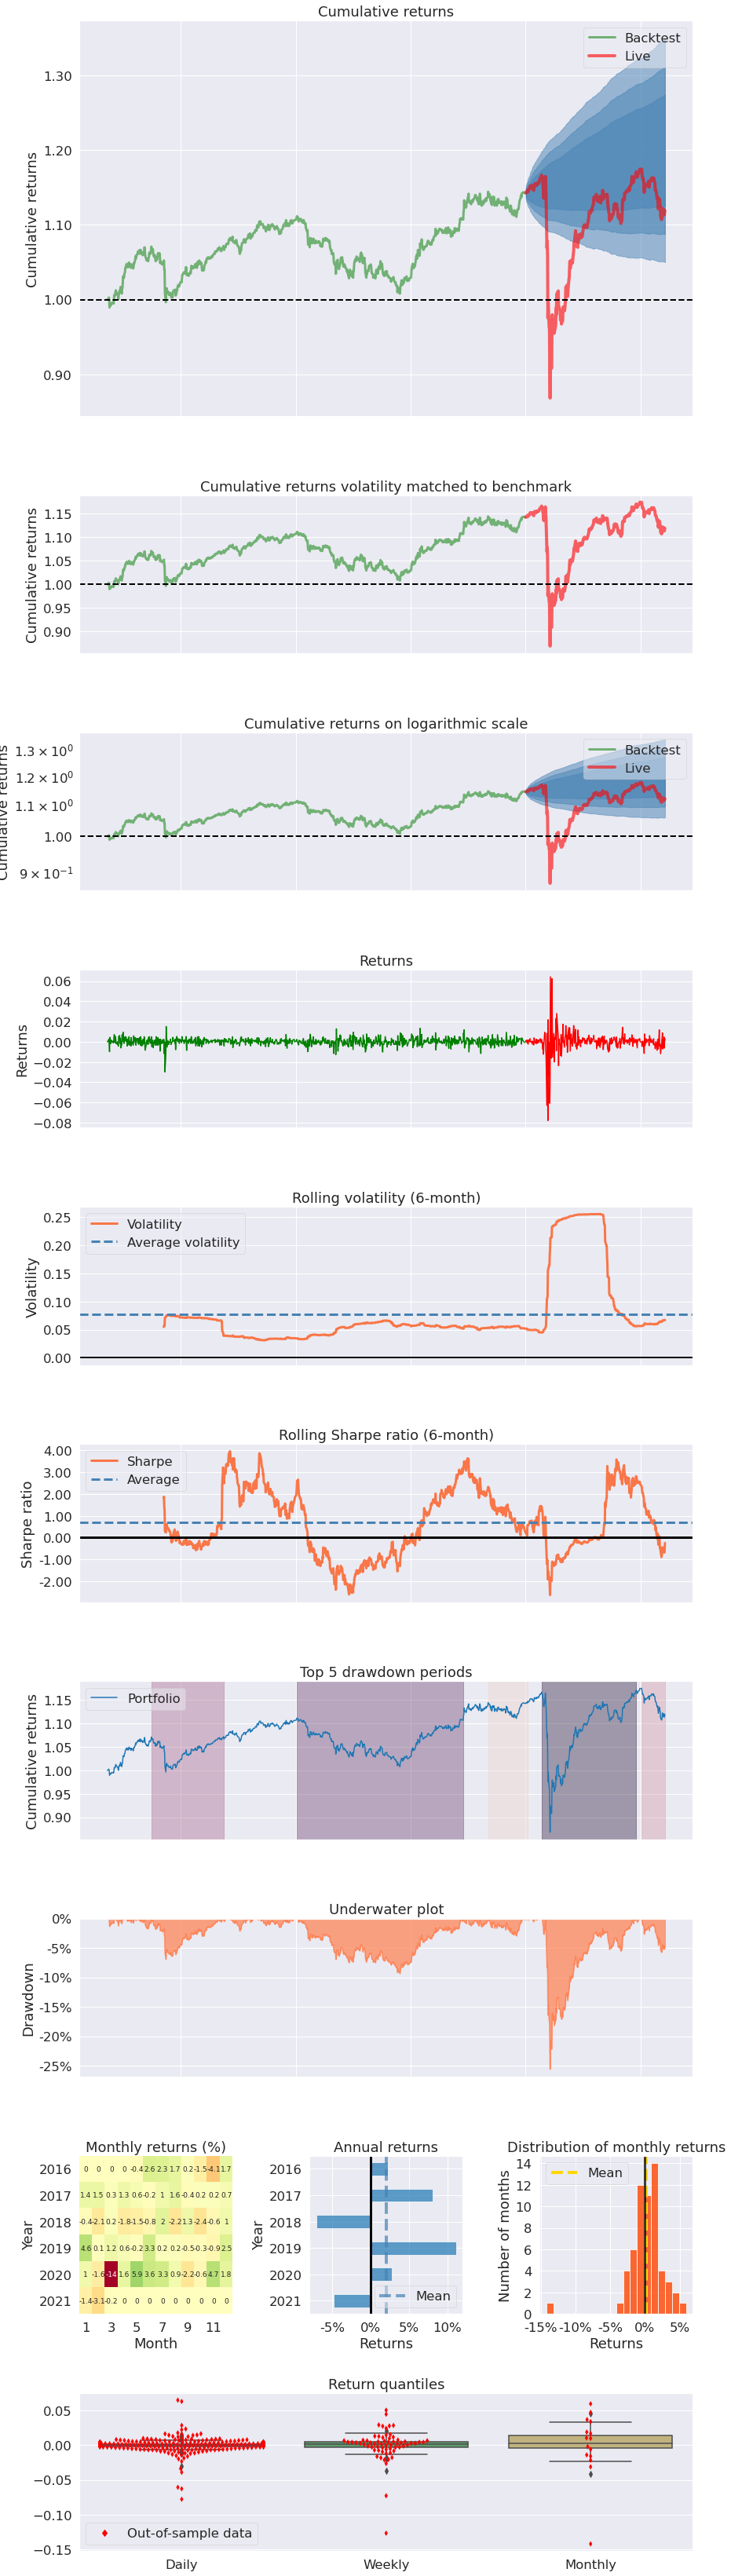

In [9]:
#df_finax = df_finax.tz_localize('UTC')
pf.create_returns_tear_sheet(df_finax['frck'].pct_change().dropna(), live_start_date = '2020-01-01')
# https://nbviewer.jupyter.org/format/slides/github/quantopian/pyfolio/blob/master/pyfolio/examples/pyfolio_talk_slides.ipynb#/15
# functions can be calles separately from modules

# admiral

In [47]:
df_admiral_etfs = pd.read_csv('materials/etf_list_admiral_markets.csv', sep = ';')
df_admiral_etfs.head(10)

,Nr.,INVESTsymbol,Description,Instrument Subtype,Listedcurrency,Min.contractsize,Contractstep,MaximumContractSize,Min.Margin,"Trading session, EET",yahoo ticker,in yahoo fin
0,1,ACWI,LYXOR MSCI ALL COUNTRY WORLD UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,ACWI.PA,NaN
1,2,AEEM,Amundi MSCI Emerging Markets UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,AEEM.PA,NaN
2,3,AUT,Lyxor STOXX Europe 600 Automobiles & Parts UCI...,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,AUT.PA,NaN
3,4,BNK,Lyxor STOXX European 600 Banks UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,BNK.PA,NaN
4,5,BNKE,LYXOR EURO STOXX BANKS DR UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,BNKE.PA,NaN
5,6,BRE,LYXOR STOXX EUROPE 600 BASIC RESOURCES UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,BRE.PA,NaN
6,7,BSXP,Lyxor EURO STOXX 50 Daily Short UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,BSX.PA,NaN
7,8,BX4,Lyxor CAC 40 Daily Double Short UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,BX4.PA,NaN
8,9,BXX,LYXOR EURO STOXX 50 DAILY DOUBLE SHORT UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,BXX.PA,NaN
9,10,C50,Amundi Euro Stoxx 50 UCITS ETF,France (Euronext) ETF,EUR,1,1,10000,100%,10:01 - 18:30 Mon -Fri,C50.PA,NaN


In [48]:
admiral_etfs_av = df_admiral_etfs.loc[df_admiral_etfs['in yahoo fin'] == 'n', 'yahoo ticker']
admiral_etfs_av.shape

(4,)

In [49]:
admiral_etfs_av_list = admiral_etfs_av.tolist()
admiral_etfs_av_list

['C5S2.PA', 'RIO2.PA', 'DNRG.SW', 'UKEUBH.SW']

# admiral tickers data

## alphavantage check

In [50]:
#search = investpy.search_quotes('ACWI')
dfs = []
metas = []
ts = TimeSeries(key='F5DIRSGL3KXINNCM', output_format = 'pandas')
is_present = [] # only 20 admiral tickers present in alphavantage
# ['ACWI', 'AEEM', 'AUT', 'BINK', 'CAC', 'CMU', 'CST', 'ERO', 'GRE', 'IND', 'INSP', 'JPN', 
# 'JPNH', 'MFE', 'MWO', 'OIL', 'SELT', 'SGQI', 'SHC', 'USA', 'VERX']

for ticker in admiral_etfs_av_list:
    try:
        df, meta = ts.get_monthly(ticker)
        dfs.append(df)
        metas.append(meta)
        is_present.append(1)
    except Exception as e:
        print(f'ticker {ticker} data retreive error...')
        print(e)
        is_present.append(0)
    else:
        print(f'ticker {ticker} SUCCESS.....')
    time.sleep(13)

ticker C5S2.PA data retreive error...
Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_MONTHLY.
ticker RIO2.PA data retreive error...
Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_MONTHLY.
ticker DNRG.SW data retreive error...
Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_MONTHLY.
ticker UKEUBH.SW data retreive error...
Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_MONTHLY.


## yfinance check

In [51]:
admiral_etfs_yf = df_admiral_etfs.loc[df_admiral_etfs['in yahoo fin'].isna(), 'yahoo ticker']
admiral_etfs_yf.shape

(181,)

In [53]:
admiral_etfs_yf_list = admiral_etfs_yf.tolist()
admiral_etfs_yf_list[:10]

['ACWI.PA',
 'AEEM.PA',
 'AUT.PA',
 'BNK.PA',
 'BNKE.PA',
 'BRE.PA',
 'BSX.PA',
 'BX4.PA',
 'BXX.PA',
 'C50.PA']

In [54]:
df_admiral = yf.download(tickers = ' '.join(admiral_etfs_yf_list), period = 'max', interval = '1d')

[*********************100%***********************]  181 of 181 completed

1 Failed download:
- MTX1.PA: No data found, symbol may be delisted


In [55]:
pickle.dump(df_admiral, open('data/df_admiral_yf.pickle', 'wb'))

In [56]:
df_admiral.head()

Adj Close                                                       \
            2INVE.MC ACWI.PA AEEM.PA AGED.L AUCO.AS AUT.PA BNK.PA BNKE.PA   
Date                                                                        
2006-10-23       NaN     NaN     NaN    NaN     NaN    NaN    NaN     NaN   
2006-10-24       NaN     NaN     NaN    NaN     NaN    NaN    NaN     NaN   
2006-10-25       NaN     NaN     NaN    NaN     NaN    NaN    NaN     NaN   
2006-10-26       NaN     NaN     NaN    NaN     NaN    NaN    NaN     NaN   
2006-10-27       NaN     NaN     NaN    NaN     NaN    NaN    NaN     NaN   

                          ... Volume                                      \
           BRE.PA BSX.PA  ... XMEM.L XMWD.L XS2D.L XSMI.SW XSPD.L XSPU.L   
Date                      ...                                              
2006-10-23    NaN    NaN  ...    NaN    NaN    NaN     NaN    NaN    NaN   
2006-10-24    NaN    NaN  ...    NaN    NaN    NaN     NaN    NaN    NaN   
2006-10-25    NaN    NaN  ...    NaN    NaN    NaN     NaN    NaN    NaN   
2006-10-26    NaN    NaN  ...    NaN    NaN    NaN     NaN    NaN    NaN   
2006-10-27    NaN    NaN  ...    NaN    NaN    NaN     NaN    NaN    NaN   

                                        
           XSSX.L XSX6.L XUKS.L XUKX.L  
Date                                    
2006-10-23    NaN    NaN    NaN    NaN  
2006-10-24    NaN    NaN    NaN    NaN  
2006-10-25    NaN    NaN    NaN    NaN  
2006-10-26    NaN    NaN    NaN    NaN  
2006-10-27    NaN    NaN    NaN    NaN  

[5 rows x 1086 columns]

In [57]:
df_admiral.shape

(3695, 1086)

In [58]:
df_admiral.columns

MultiIndex([('Adj Close', '2INVE.MC'),
            ('Adj Close',  'ACWI.PA'),
            ('Adj Close',  'AEEM.PA'),
            ('Adj Close',   'AGED.L'),
            ('Adj Close',  'AUCO.AS'),
            ('Adj Close',   'AUT.PA'),
            ('Adj Close',   'BNK.PA'),
            ('Adj Close',  'BNKE.PA'),
            ('Adj Close',   'BRE.PA'),
            ('Adj Close',   'BSX.PA'),
            ...
            (   'Volume',   'XMEM.L'),
            (   'Volume',   'XMWD.L'),
            (   'Volume',   'XS2D.L'),
            (   'Volume',  'XSMI.SW'),
            (   'Volume',   'XSPD.L'),
            (   'Volume',   'XSPU.L'),
            (   'Volume',   'XSSX.L'),
            (   'Volume',   'XSX6.L'),
            (   'Volume',   'XUKS.L'),
            (   'Volume',   'XUKX.L')],
           length=1086)